In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-nlsq-MM)

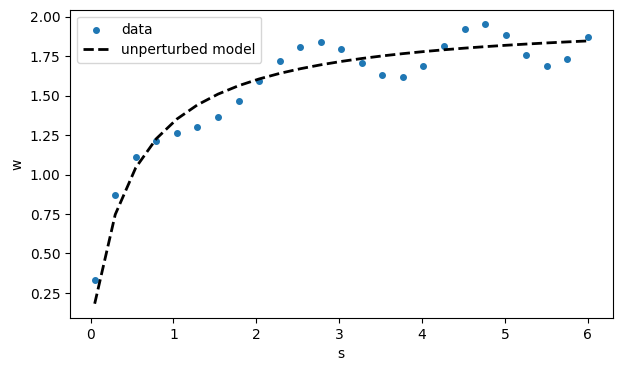

In [2]:
m = 25
V, Km = 2, 0.5
s = linspace(0.05, 6, m)
model = lambda x: V * x / (Km + x)
w = model(s) + 0.15 * cos(2 * exp(s / 16) * s)    # noise added

fig, ax = subplots()
ax.scatter(s, w, label="data")
ax.plot(s, model(s), 'k--', label="unperturbed model")
xlabel("s"), ylabel("w")
legend();

```{index} ! Python; destructuring
```

The idea is to pretend that we know nothing of the origins of this data and use nonlinear least squares to find the parameters in the theoretical model function $v(s)$. In {eq}`nlsq-misfit`, the $s$ variable plays the role of $t$, and $v$ plays the role of $g$.
```{tip}
:class: dropdown
Putting comma-separated values on the left of an assignment will **destructure** the right-hand side, drawing individual assignments from entries of a vector, for example.
```

In [3]:
def misfit(c):
    V, Km = c  # rename components for clarity
    f = V * s / (Km + s) - w
    return f

In the Jacobian the derivatives are with respect to the parameters in $\mathbf{x}$.

In [4]:
def misfitjac(x):
    V, Km = x   # rename components for clarity
    J = zeros([m, 2])
    J[:, 0] = s / (Km + s)          # d/d(V)
    J[:, 1] = -V * s / (Km + s)**2  # d/d(Km)
    return J

In [5]:
x1 = [1, 0.75]
x = FNC.newtonsys(misfit, misfitjac, x1)
V, Km = x[-1]  # final values
print(f"estimates are V = {V:.3f}, Km = {Km:.3f}")

estimates are V = 1.969, Km = 0.469


The final values are reasonably close to the values $V=2$, $K_m=0.5$ that we used to generate the noise-free data. Graphically, the model looks close to the original data.

In [6]:
# since V and Km have been updated, model() is too
ax.plot(s, model(s), label="nonlinear fit")

For this particular model, we also have the option of linearizing the fit process. Rewrite the model as 

```{math}
:enumerated: false
\frac{1}{w} = \frac{\alpha}{s} + \beta = \alpha \cdot s^{-1} + \beta
```

for the new fitting parameters $\alpha=K_m/V$ and $\beta=1/V$. This corresponds to the misfit function whose entries are

$$f_i([\alpha,\beta]) = \left(\alpha \cdot \frac{1}{s_i} + \beta\right) - \frac{1}{w_i}$$
for $i=1,\ldots,m$. Although this misfit is nonlinear in $s$ and $w$, it's linear in the unknown parameters $\alpha$ and $\beta$. This lets us pose and solve it as a linear least-squares problem.

In [7]:
from numpy.linalg import lstsq
A = array( [[1 / s[i], 1.0] for i in range(len(s))] )
z = lstsq(A, 1 / w, rcond=None)[0]
alpha, beta = z
print("alpha:", alpha, "beta:", beta)

alpha: 0.12476333709901544 beta: 0.571395910043123


The two fits are different; they do not optimize the same quantities.

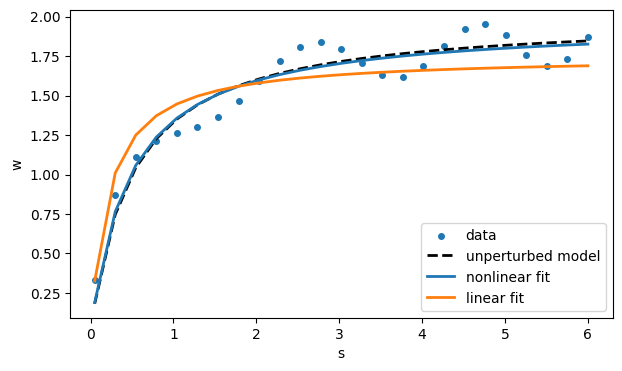

In [8]:
linmodel = lambda x: 1 / (beta + alpha / x)
ax.plot(s, linmodel(s), label="linear fit")
ax.legend()
fig

The truly nonlinear fit is clearly better in this case. It optimizes a residual for the original measured quantity rather than a transformed one we picked for algorithmic convenience.